<a href="https://colab.research.google.com/github/jayakhan/document-classification/blob/main/lstm_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Import Libraries

In [1]:
import numpy as np
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2) Set Model Hyperparameters

In [2]:
#Hyperparameters
vocab_size = 2000
embedding_dim = 64
max_length = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## 3) Load Real Dataset

In [4]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/synthetic_data_v2.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [5]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## 4) Split data into 70% training and 30% validation datasets

In [6]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [7]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

2100
2100
900
900


In [8]:
# Check distribution of training dataset
pd.Series(train_labels).value_counts()

composmswindowsmisc     123
recsportbaseball        121
scispace                116
scicrypt                114
socreligionchristian    110
scimed                  106
talkpoliticsguns        106
recsporthockey          104
altatheism              103
talkpoliticsmisc        103
miscforsale             102
recautos                102
compsysibmpchardware    102
recmotorcycles          101
compwindowsx            101
compgraphics             99
compsysmachardware       99
talkreligionmisc         98
talkpoliticsmideast      97
scielectronics           93
dtype: int64

In [9]:
 # Check distribution of validation dataset
 pd.Series(validation_labels).value_counts()

composmswindowsmisc     52
recsportbaseball        52
scispace                50
scicrypt                49
socreligionchristian    47
talkpoliticsguns        46
scimed                  46
miscforsale             44
recautos                44
talkpoliticsmisc        44
recsporthockey          44
altatheism              44
compsysmachardware      43
compwindowsx            43
recmotorcycles          43
compgraphics            43
compsysibmpchardware    43
talkreligionmisc        42
talkpoliticsmideast     41
scielectronics          40
dtype: int64

## 5a) Tokenization and Vectorization - Articles

In [10]:
# Tokenize articles for training datasets
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
train_sequences = tokenizer.texts_to_sequences(train_articles)
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

print(train_sequences[10])
print(validation_sequences[10])

[1253, 195, 857, 1047, 7, 15, 340, 838, 1086, 144, 10, 135, 1145, 1634, 779, 442, 92, 58, 193, 30, 369, 1264, 882, 27, 229, 1343, 131, 33, 271, 334, 58, 47, 204, 656, 752, 1293, 1140, 5, 1463, 586, 46, 8, 363, 147, 357, 136, 443, 27, 281, 1928, 915, 99, 857, 27, 569, 214, 34, 822, 21, 752, 722, 27, 691, 1141, 27, 124, 369, 30, 27, 1338, 1921, 225, 166, 1900, 131, 2, 244, 113, 1050, 558, 980, 234, 2, 1722, 1303, 115, 1942, 134, 33, 58, 2, 312, 1167, 405, 226, 205, 1248, 199, 1264, 569, 752, 46, 651, 27, 27, 127, 3, 646, 1861, 508, 2, 27, 1263, 1113, 144, 225, 6, 1216, 129, 753, 284, 187, 1246, 1928, 737, 1004, 803, 1955, 424, 458, 58, 172, 924, 1833, 56, 474, 8, 562, 484, 123, 458, 1047, 1779, 1249, 241, 1381, 121, 651, 24, 72, 1941, 128, 381, 1895, 1248, 483, 656, 1799, 623, 1145, 165, 1017, 656, 153, 381, 25, 3, 6, 1337, 1088, 13, 741, 121, 814, 414, 121, 391, 370, 577, 2, 92, 69, 312, 334, 1555, 1263, 1293, 137, 409, 30, 261, 27, 484, 99, 651, 864, 108, 557, 381, 308, 56, 11, 1279, 1

In [11]:
# Padding to the end of the training and validation articles
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

print(len(validation_sequences[10]))
print(len(validation_padded[10]))

500
500
499
500
498
500
496
500


## 5b) Tokenization and Vectorization - Labels

In [12]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels_new)
training_label_seq = np.asarray(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.asarray(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[20]
[9]
(2100, 1)
[20]
[16]
[13]
(900, 1)


## 6) Model Building

In [13]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 2000, and output embedding dimension of size 64
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
Total params: 204,384
Trainable params: 204,384
Non-trainable params: 0
_________________________________________________________________


In [14]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, None) <dtype: 'float32'>
(None, 32) <dtype: 'float32'>
embedding (None, None) float32
bidirectional (None, None, 64) float32
dense (None, 128) float32
dense_1 (None, 64) float32


[None, None, None, None]

In [15]:
# Check dataset before model fitting
print(train_padded.shape)
print(training_label_seq.shape)
print(validation_padded.shape)
print(validation_label_seq.shape)

(2100, 500)
(2100, 1)
(900, 500)
(900, 1)


In [16]:
# Check dataset before model fitting
print(type(train_padded))
print(type(training_label_seq))
print(type(validation_padded))
print(type(validation_label_seq))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 6) Model Validation

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
66/66 - 22s - loss: 3.2005 - accuracy: 0.0571 - val_loss: 3.0054 - val_accuracy: 0.0556 - 22s/epoch - 337ms/step
Epoch 2/10
66/66 - 14s - loss: 2.8860 - accuracy: 0.0948 - val_loss: 2.6660 - val_accuracy: 0.1467 - 14s/epoch - 216ms/step
Epoch 3/10
66/66 - 14s - loss: 2.5855 - accuracy: 0.1586 - val_loss: 2.4716 - val_accuracy: 0.1889 - 14s/epoch - 216ms/step
Epoch 4/10
66/66 - 14s - loss: 1.9991 - accuracy: 0.3110 - val_loss: 1.7661 - val_accuracy: 0.3533 - 14s/epoch - 218ms/step
Epoch 5/10
66/66 - 14s - loss: 1.6358 - accuracy: 0.4062 - val_loss: 1.6266 - val_accuracy: 0.3922 - 14s/epoch - 218ms/step
Epoch 6/10
66/66 - 14s - loss: 1.2395 - accuracy: 0.5500 - val_loss: 1.2654 - val_accuracy: 0.5433 - 14s/epoch - 218ms/step
Epoch 7/10
66/66 - 14s - loss: 1.2670 - accuracy: 0.5533 - val_loss: 1.1795 - val_accuracy: 0.5578 - 14s/epoch - 217ms/step
Epoch 8/10
66/66 - 14s - loss: 0.8005 - accuracy: 0.7462 - val_loss: 0.8761 - val_accuracy: 0.6833 - 14s/epoch - 219ms/step
Epoch 9/

## 7) Model Evaluation

In [18]:
score = model.evaluate(validation_padded, validation_label_seq, verbose=10)

print("Loss: %.3f \nAccuracy: %.3f" % (score[0], score[1]))

Loss: 0.758 
Accuracy: 0.730


In [19]:
from sklearn.metrics import classification_report

y_pred = model.predict(validation_padded, batch_size=64, verbose=10)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(validation_label_seq.copy(), y_pred_bool.copy()))

              precision    recall  f1-score   support

           1       0.75      0.63      0.69        52
           2       0.96      0.92      0.94        52
           3       0.92      0.94      0.93        50
           4       1.00      0.90      0.95        49
           5       0.51      0.94      0.66        47
           6       0.76      0.80      0.78        46
           7       0.61      0.93      0.74        46
           8       0.96      0.98      0.97        44
           9       0.53      0.39      0.45        44
          10       0.76      0.70      0.73        44
          11       0.93      0.89      0.91        44
          12       0.71      0.55      0.62        44
          13       0.94      0.37      0.53        43
          14       0.73      0.95      0.83        43
          15       0.95      0.88      0.92        43
          16       0.48      0.79      0.60        43
          17       0.59      0.98      0.74        43
          18       0.40    

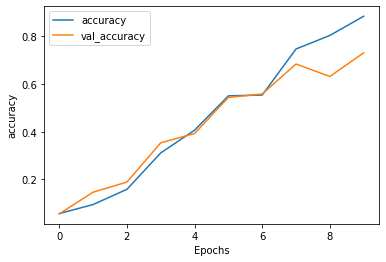

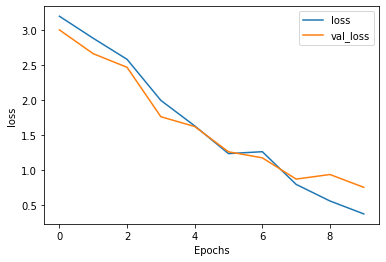

In [20]:
# Plot graphs for accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")